In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.svm import SVR, SVC
from sklearn.metrics import (mean_squared_error, mean_absolute_error, r2_score, 
                             accuracy_score, classification_report, confusion_matrix)

In [2]:
from sklearn.datasets import make_regression, make_classification

In [3]:
X_reg, y_reg = make_regression(n_samples=200, n_features=5, noise=0.1, random_state=42)

In [4]:
X_clf, y_clf = make_classification(n_samples=200, n_features=5, n_classes=2, random_state=42)

In [5]:
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

In [6]:
scaler_reg = StandardScaler()
X_reg_train_scaled = scaler_reg.fit_transform(X_reg_train)
X_reg_test_scaled = scaler_reg.transform(X_reg_test)

In [7]:
# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_reg_train_scaled, y_reg_train)

LinearRegression()

In [8]:
# Predictions
lr_predictions = lr_model.predict(X_reg_test_scaled)

In [9]:
# Evaluation Metrics for Regression
lr_mse = mean_squared_error(y_reg_test, lr_predictions)
lr_mae = mean_absolute_error(y_reg_test, lr_predictions)
lr_r2 = r2_score(y_reg_test, lr_predictions)

In [10]:
regression_report = pd.DataFrame({
    'Model': ['Linear Regression'],
    'Mean Squared Error': [lr_mse],
    'Mean Absolute Error': [lr_mae],
    'R-squared': [lr_r2]
})
print("Regression Evaluation Report:")
print(regression_report)

Regression Evaluation Report:
               Model  Mean Squared Error  Mean Absolute Error  R-squared
0  Linear Regression            0.008506             0.077383   0.999999


In [11]:
# KNN Regression
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_reg_train_scaled, y_reg_train)
knn_predictions = knn_reg.predict(X_reg_test_scaled)

In [12]:
knn_mse = mean_squared_error(y_reg_test, knn_predictions)
knn_mae = mean_absolute_error(y_reg_test, knn_predictions)
knn_r2 = r2_score(y_reg_test, knn_predictions)

In [13]:
regression_report = pd.concat([
    regression_report, 
    pd.DataFrame({
        'Model': ['KNN Regression'],
        'Mean Squared Error': [knn_mse],
        'Mean Absolute Error': [knn_mae],
        'R-squared': [knn_r2]
    })
])
print("\nUpdated Regression Evaluation Report:")
print(regression_report)


Updated Regression Evaluation Report:
               Model  Mean Squared Error  Mean Absolute Error  R-squared
0  Linear Regression            0.008506             0.077383   0.999999
0     KNN Regression         1308.201953            28.884528   0.850500


In [14]:
# Decision Tree Regression
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_reg_train_scaled, y_reg_train)
dt_predictions = dt_reg.predict(X_reg_test_scaled)

In [15]:
dt_mse = mean_squared_error(y_reg_test, dt_predictions)
dt_mae = mean_absolute_error(y_reg_test, dt_predictions)
dt_r2 = r2_score(y_reg_test, dt_predictions)

In [16]:
regression_report = pd.concat([
    regression_report, 
    pd.DataFrame({
        'Model': ['Decision Tree Regression'],
        'Mean Squared Error': [dt_mse],
        'Mean Absolute Error': [dt_mae],
        'R-squared': [dt_r2]
    })
])
print("\nFinal Regression Evaluation Report:")
print(regression_report)


Final Regression Evaluation Report:
                      Model  Mean Squared Error  Mean Absolute Error  \
0         Linear Regression            0.008506             0.077383   
0            KNN Regression         1308.201953            28.884528   
0  Decision Tree Regression         1328.427285            30.855694   

   R-squared  
0   0.999999  
0   0.850500  
0   0.848189  


In [17]:
# Splitting the dataset for classification
X_clf_train, X_clf_test, y_clf_train, y_clf_test = train_test_split(
    X_clf, y_clf, test_size=0.2, random_state=42
)

# Standardize the features
scaler_clf = StandardScaler()
X_clf_train_scaled = scaler_clf.fit_transform(X_clf_train)
X_clf_test_scaled = scaler_clf.transform(X_clf_test)

In [18]:
# Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_clf_train_scaled, y_clf_train)
log_predictions = log_reg.predict(X_clf_test_scaled)

log_accuracy = accuracy_score(y_clf_test, log_predictions)
log_report = classification_report(y_clf_test, log_predictions)
log_confusion = confusion_matrix(y_clf_test, log_predictions)

In [19]:
# KNN Classification
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_clf_train_scaled, y_clf_train)
knn_predictions = knn_clf.predict(X_clf_test_scaled)

knn_accuracy = accuracy_score(y_clf_test, knn_predictions)
knn_report = classification_report(y_clf_test, knn_predictions)
knn_confusion = confusion_matrix(y_clf_test, knn_predictions)

In [20]:
# Decision Tree Classification
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_clf_train_scaled, y_clf_train)
dt_predictions = dt_clf.predict(X_clf_test_scaled)

dt_accuracy = accuracy_score(y_clf_test, dt_predictions)
dt_report = classification_report(y_clf_test, dt_predictions)
dt_confusion = confusion_matrix(y_clf_test, dt_predictions)

In [21]:
# SVM Classification
svm_clf = SVC(random_state=42)
svm_clf.fit(X_clf_train_scaled, y_clf_train)
svm_predictions = svm_clf.predict(X_clf_test_scaled)

svm_accuracy = accuracy_score(y_clf_test, svm_predictions)
svm_report = classification_report(y_clf_test, svm_predictions)
svm_confusion = confusion_matrix(y_clf_test, svm_predictions)

In [22]:
classification_report_table = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'SVM'],
    'Accuracy': [log_accuracy, knn_accuracy, dt_accuracy, svm_accuracy]
})
print("\nClassification Evaluation Report:")
print(classification_report_table)


Classification Evaluation Report:
                 Model  Accuracy
0  Logistic Regression     0.875
1                  KNN     0.800
2        Decision Tree     0.775
3                  SVM     0.850


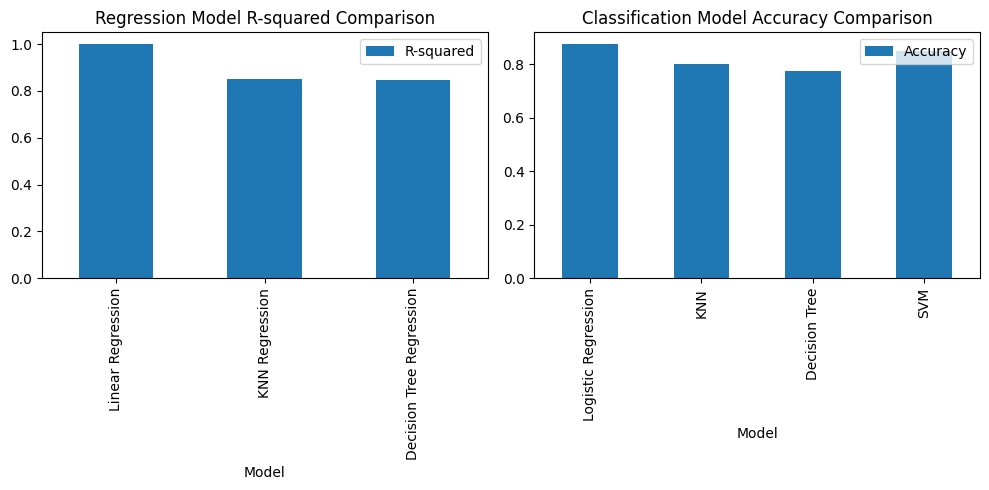

In [23]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
regression_report.plot(x='Model', y='R-squared', kind='bar', ax=plt.gca())
plt.title('Regression Model R-squared Comparison')
plt.tight_layout()

plt.subplot(1, 2, 2)
classification_report_table.plot(x='Model', y='Accuracy', kind='bar', ax=plt.gca())
plt.title('Classification Model Accuracy Comparison')
plt.tight_layout()

plt.show()